# World Happiness Index

We use this data set to learn some data aggregation techniques of pandas.

Input file: World_Happiness_2015.csv

In [2]:
import numpy as np
import pandas as pd

In [3]:
# read in the dataset. Note that we do not assign row index this time
happiness2015 = pd.read_csv('World_Happiness_2015.csv')

happiness2015.head()     # Display the first 5 rows of data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
# Get some basic info of the Dataframe

print (happiness2015.info())
print (happiness2015.index)   # row index = np.arange(158)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<h3>1. Let's check the ranking of some countries </h3>
<h3>2. Focus on getting the data from Eastern Asian region </h3>

In [6]:
# What is the ranking of USA?
# First, find the row index from the 'Country' column for 'United States'

bool_US = happiness2015['Country'].isin(['United States'])  # another way to do boolean array
print (bool_US[0:16])

rank_US = happiness2015.loc[bool_US,'Happiness Rank'].values[0]  # Why "value[0]"?

print ("\nUSA ranked #", rank_US)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
Name: Country, dtype: bool

USA ranked # 15


In [22]:
# Examine the column "Region"

region = happiness2015['Region'].unique()  # unique() returns an array of unique names in 'Region' column 

# Remember you can also use the pd.Series.describe()
# region = happiness2015['Region'].describe()

print ("Number of regions:", region.size)
print (region)

happiness2015['Region'].value_counts()

Number of regions: 10
['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

37         Taiwan
45          Japan
46    South Korea
71      Hong Kong
83          China
99       Mongolia
Name: Country, dtype: object


<AxesSubplot:title={'center':'Eastern Asia Region'}, ylabel='Country'>

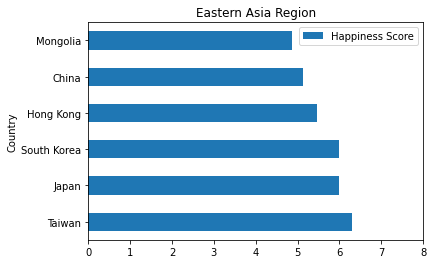

In [4]:
# What are the countries in Eastern Asia

is_E_Asia = happiness2015['Region'] == 'Eastern Asia'
E_Asia = happiness2015[is_E_Asia]     # extract the countries from E. Asia
print (E_Asia['Country'])

# A simple plot for Eastern Asia region

E_Asia.plot(x='Country', y ='Happiness Score', kind ='barh', title='Eastern Asia Region', xlim=(0,8))

<h3> We are interested in the average happiness scores for each region</h3>

In [24]:
# Use Dict and for loop 

mean_happiness = {}

for r in region:
    region_group = happiness2015[happiness2015['Region'] == r]   # This extracts the countries in the region, r
    mean = region_group['Happiness Score'].mean()   # This calculates the average score for this region_group
    mean_happiness[r] = mean
    
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

<AxesSubplot:title={'center':'Region Average Score'}>

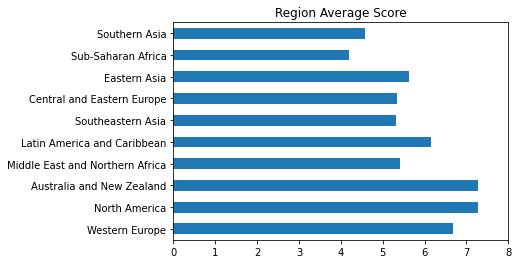

In [6]:
# Let's turn this dictionary into a Dataframe
# and analyze the average score for each world region

world_score = pd.DataFrame(mean_happiness, index = [0])   # A bit tricky for a dict of scalar 

world_score.T.plot(kind ='barh', title='Region Average Score',legend = False, xlim=(0,8))

<h3>Create a GroupBy object on the 'Region' column</h3>

In [32]:
# How about using DataFrame.groupby()?

# Create a Groupby object on the 'Region' column

regions = happiness2015.groupby('Region')

print (regions)    # A Groupby object is created

regions.groups  # Some details about the GroupBy object

# The result is a dictionary in which each key corresponds to a region name. 
# The values include the index for each row in the original happiness2015 DataFrame 
# with the corresponding region name

<class 'pandas.io.formats.printing.PrettyDict'>


{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

In [35]:
# Use the GroupBy.get_group() method to select data from the GroupBy object
# Get group data for Canada and USA

regions.get_group('North America')  

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [36]:
# Use the GroupBy.get_group() method to select data from the GroupBy object

East_Asia = regions.get_group('Eastern Asia')

# Note: region.get_group('column') is a DataFrame

print (type(East_Asia))

East_Asia[['Country','Region','Happiness Rank','Happiness Score']]

<class 'pandas.core.frame.DataFrame'>


,Country,Region,Happiness Rank,Happiness Score
37,Taiwan,Eastern Asia,38,6.298
45,Japan,Eastern Asia,46,5.987
46,South Korea,Eastern Asia,47,5.984
71,Hong Kong,Eastern Asia,72,5.474
83,China,Eastern Asia,84,5.140
99,Mongolia,Eastern Asia,100,4.874


In [37]:
# Use the GroupBy.size() to determine the number of countries in each region

region_size = regions.size()
region_size

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [11]:
# Other useful GroupBy methods

# This will display the mean value for all column data for each region
# Note that each aggregation method results in a DataFrame:
# DataFrame.index = region names, DataFrame.columns = the original column labels

print (type(regions.mean()))
print (regions.mean().index)
print (regions.mean().columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America', 'Southeastern Asia',
       'Southern Asia', 'Sub-Saharan Africa', 'Western Europe'],
      dtype='object', name='Region')
Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')


                                 Happiness Rank  Happiness Score  \
Region                                                             
Australia and New Zealand              9.500000         7.285000   
Central and Eastern Europe            79.000000         5.332931   
Eastern Asia                          64.500000         5.626167   
Latin America and Caribbean           46.909091         6.144682   
Middle East and Northern Africa       77.600000         5.406900   
North America                         10.000000         7.273000   
Southeastern Asia                     81.222222         5.317444   
Southern Asia                        113.142857         4.580857   
Sub-Saharan Africa                   127.900000         4.202800   
Western Europe                        29.523810         6.689619   

                                 Standard Error  Economy (GDP per Capita)  \
Region                                                                      
Australia and New Zealand    

<AxesSubplot:title={'center':'Regional Economy Score'}, ylabel='Region'>

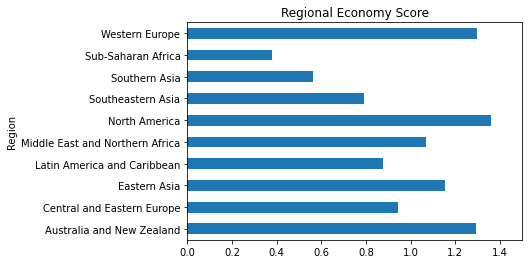

In [41]:
print (regions.mean())

# We can easily make similar plot as before, for other metric
# Let's look at Economy (GDP per Capita)

regions.mean().plot(y ='Economy (GDP per Capita)', kind ='barh', title='Regional Economy Score', legend = None,
                    xlim=(0,1.5))

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


<AxesSubplot:title={'center':'Regional Happiness Score'}, ylabel='Region'>

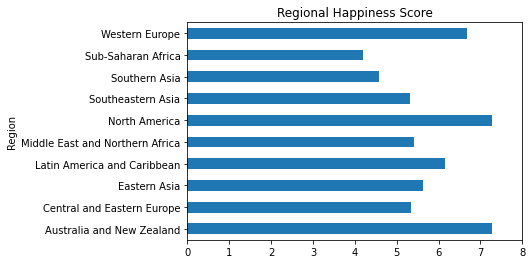

In [48]:
region_mean = regions.mean()
mean_happiness = region_mean['Happiness Score']

print (mean_happiness)

# We can easily make similar plot as before, for other metric
# Let's look at Economy (GDP per Capita)

mean_happiness.plot(kind ='barh', title='Regional Happiness Score', legend = None,
                    xlim=(0,8))

In [49]:
# Other useful GroupBy methods

# This will display the maximum value for all column data for each region
print (regions.max())

                                        Country  Happiness Rank  \
Region                                                            
Australia and New Zealand           New Zealand              10   
Central and Eastern Europe           Uzbekistan             134   
Eastern Asia                             Taiwan             100   
Latin America and Caribbean           Venezuela             119   
Middle East and Northern Africa           Yemen             156   
North America                     United States              15   
Southeastern Asia                       Vietnam             145   
Southern Asia                         Sri Lanka             153   
Sub-Saharan Africa                     Zimbabwe             158   
Western Europe                   United Kingdom             102   

                                 Happiness Score  Standard Error  \
Region                                                             
Australia and New Zealand                  7.286         0.

In [17]:
# Other useful GroupBy methods: agg()

# The usefulness of agg() method: allowing multiple functions at the same time
# We want to see mean and max values of regional happiness scores
# Syntax: GroupBy.agg(['mean', 'max']). Note the square brackets.

regions_happy = regions['Happiness Score']
print (regions_happy.agg(['mean', 'max']))

                                     mean    max
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587


In [18]:
# Somewhat advanced feature: You can also pass user-defined function to agg()

# Calculating the difference between max and mean of the score

def diff(group):
    return (group.max() - group.mean())

print (regions_happy.agg(['mean', 'max', diff]))

                                     mean    max      diff
Region                                                    
Australia and New Zealand        7.285000  7.286  0.001000
Central and Eastern Europe       5.332931  6.505  1.172069
Eastern Asia                     5.626167  6.298  0.671833
Latin America and Caribbean      6.144682  7.226  1.081318
Middle East and Northern Africa  5.406900  7.278  1.871100
North America                    7.273000  7.427  0.154000
Southeastern Asia                5.317444  6.798  1.480556
Southern Asia                    4.580857  5.253  0.672143
Sub-Saharan Africa               4.202800  5.477  1.274200
Western Europe                   6.689619  7.587  0.897381


<h3>Apply the pivot_table() method to aggregate data</h3>

In [19]:
# pandas pivot_table() is similar to Excel's pivot table function

regions = happiness2015.pivot_table(index=['Region'])

print (regions)    # Interesting observation: the columns are arranged alphabetically

                                 Dystopia Residual  Economy (GDP per Capita)  \
Region                                                                         
Australia and New Zealand                 2.265355                  1.291880   
Central and Eastern Europe                2.021400                  0.942438   
Eastern Asia                              1.681607                  1.151780   
Latin America and Caribbean               2.622577                  0.876815   
Middle East and Northern Africa           1.980008                  1.066973   
North America                             2.480935                  1.360400   
Southeastern Asia                         1.783020                  0.789054   
Southern Asia                             2.016769                  0.560486   
Sub-Saharan Africa                        2.019980                  0.380473   
Western Europe                            2.151185                  1.298596   

                                   Fami

In [20]:
# You can add multiple columns in the index for pv_table

regions_country = happiness2015.pivot_table(index=['Region', 'Country'])
print(regions_country)

                                           Dystopia Residual  \
Region                     Country                             
Australia and New Zealand  Australia                 2.26646   
                           New Zealand               2.26425   
Central and Eastern Europe Albania                   1.89894   
                           Armenia                   1.75873   
                           Azerbaijan                2.00073   
...                                                      ...   
Western Europe             Portugal                  1.26462   
                           Spain                     2.12367   
                           Sweden                    2.37119   
                           Switzerland               2.51738   
                           United Kingdom            1.96994   

                                           Economy (GDP per Capita)   Family  \
Region                     Country                                             
Austral

In [21]:
# Add column 'Happines Score' to the pivot table 

regions = happiness2015.pivot_table(index=['Region'], values = ['Happiness Score'])
# Note that the mean of Happiness Score is the result - mean() is the default function

print (regions)

                                 Happiness Score
Region                                          
Australia and New Zealand               7.285000
Central and Eastern Europe              5.332931
Eastern Asia                            5.626167
Latin America and Caribbean             6.144682
Middle East and Northern Africa         5.406900
North America                           7.273000
Southeastern Asia                       5.317444
Southern Asia                           4.580857
Sub-Saharan Africa                      4.202800
Western Europe                          6.689619


In [22]:
# Add aggfunc to aggregate data

regions_happiness = happiness2015.pivot_table(index=['Region'], values=['Happiness Score'], 
                                              aggfunc=[np.max, 'mean', len]) 

# Note: many ways to call the functions
                            
print (regions_happiness)

                                           amax            mean  \
                                Happiness Score Happiness Score   
Region                                                            
Australia and New Zealand                 7.286        7.285000   
Central and Eastern Europe                6.505        5.332931   
Eastern Asia                              6.298        5.626167   
Latin America and Caribbean               7.226        6.144682   
Middle East and Northern Africa           7.278        5.406900   
North America                             7.427        7.273000   
Southeastern Asia                         6.798        5.317444   
Southern Asia                             5.253        4.580857   
Sub-Saharan Africa                        5.477        4.202800   
Western Europe                            7.587        6.689619   

                                            len  
                                Happiness Score  
Region                      

In [23]:
# The option 'margins' adds a row to summarize the column data
# For example: for a grand total, max column value, or average value

regions_happiness = happiness2015.pivot_table(index=['Region'], values=['Happiness Score'], 
                                              aggfunc=[np.max, 'mean', len], margins=True) 

# Note: in the row 'All', there are different results for each column 
                            
print (regions_happiness)

                                           amax            mean  \
                                Happiness Score Happiness Score   
Region                                                            
Australia and New Zealand                 7.286        7.285000   
Central and Eastern Europe                6.505        5.332931   
Eastern Asia                              6.298        5.626167   
Latin America and Caribbean               7.226        6.144682   
Middle East and Northern Africa           7.278        5.406900   
North America                             7.427        7.273000   
Southeastern Asia                         6.798        5.317444   
Southern Asia                             5.253        4.580857   
Sub-Saharan Africa                        5.477        4.202800   
Western Europe                            7.587        6.689619   
All                                       7.587        5.375734   

                                            len  
           

<AxesSubplot:title={'center':'Mean Happiness Scores by Region'}, ylabel='Region'>

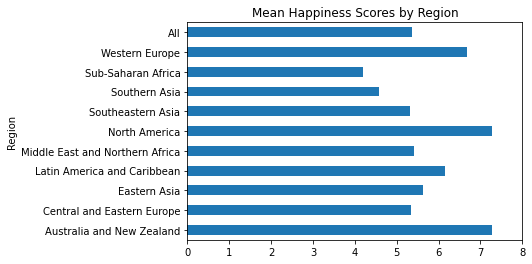

In [24]:
# Plot the happiness scores with the world average

regions_happiness = happiness2015.pivot_table(index=['Region'], values=['Happiness Score'], 
                                              aggfunc=['mean'], margins=True) 

regions_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,8), legend=False)